In [ ]:
#Here is the dataset link in case https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=koi

# Imports

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
import xgboost as xgb

#Data Pre-Processing

##Data Cleaning

In [ ]:
data = pd.read_csv('exoplanet_dataset.csv', index_col="rowid")
print(f'Number of instances: {(data.shape[0])}')
print(f'Number of features: {(data.shape[1])}')
data.head()

Number of instances: 9564
Number of features: 82


,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
rowid,,,,,,,,,,,,,,,,,,,,,
1,11446443,K00001.01,Kepler-1 b,CONFIRMED,Done,2018-08-16,CANDIDATE,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10666592,K00002.01,Kepler-2 b,CONFIRMED,Done,2018-08-16,CANDIDATE,NaN,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10748390,K00003.01,Kepler-3 b,CONFIRMED,Done,2018-08-16,CANDIDATE,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3861595,K00004.01,Kepler-1658 b,CONFIRMED,Done,2018-08-16,CANDIDATE,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8554498,K00005.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_vet_stat',
       'koi_vet_date', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov',
       'koi_comment', 'koi_period', 'koi_time0bk', 'koi_time0', 'koi_eccen',
       'koi_longp', 'koi_impact', 'koi_duration', 'koi_ingress', 'koi_depth',
       'koi_ror', 'koi_srho', 'koi_fittype', 'koi_prad', 'koi_sma', 'koi_incl',
       'koi_teq', 'koi_insol', 'koi_dor', 'koi_limbdark_mod', 'koi_ldm_coeff4',
       'koi_ldm_coeff3', 'koi_ldm_coeff2', 'koi_ldm_coeff1', 'koi_parm_prov',
       'koi_max_sngle_ev', 'koi_max_mult_ev', 'koi_model_snr', 'koi_count',
       'koi_num_transits', 'koi_tce_plnt_num', 'koi_tce_delivname',
       'koi_quarters', 'koi_bin_oedp_sig', 'koi_trans_mod', 'koi_model_dof',
       'koi_model_chisq', 'koi_datalink_dvr', 'koi_datalink_dvs', 'koi_steff',
       'koi_slogg', 'koi_smet', 'koi_srad', 'koi_smass', 'koi_sage',
       'ko

So, we initially have 9564 kepler instances, and 82 relevent columns.

### Empty Columns

We check for duplicates and missing values, and handle data issues

In [ ]:
print(f'Number of duplicated instances: {data.duplicated().sum()}')

Number of duplicated instances: 0


Good so far, no duplicated rows initially.

In [ ]:
print('Number of missing values for each column:')
empty_columns = []

for col in data.columns:
    missing_count = data[col].isna().sum()
    print('\t%s: %d' % (col, missing_count))

    if missing_count == data.shape[0]:
        # add the column to the empty columns list
        empty_columns.append(col)

print('\nEmpty columns list:', empty_columns)
print('\nTotal number of Empty Columns:', len(empty_columns))


Number of missing values for each column:
	kepid: 0
	kepoi_name: 0
	kepler_name: 6821
	koi_disposition: 0
	koi_vet_stat: 0
	koi_vet_date: 0
	koi_pdisposition: 0
	koi_score: 9564
	koi_fpflag_nt: 0
	koi_fpflag_ss: 0
	koi_fpflag_co: 0
	koi_fpflag_ec: 0
	koi_disp_prov: 0
	koi_comment: 9564
	koi_period: 0
	koi_time0bk: 0
	koi_time0: 0
	koi_eccen: 9564
	koi_longp: 9564
	koi_impact: 9564
	koi_duration: 9564
	koi_ingress: 9564
	koi_depth: 9564
	koi_ror: 9564
	koi_srho: 9564
	koi_fittype: 9564
	koi_prad: 9564
	koi_sma: 9564
	koi_incl: 9564
	koi_teq: 9564
	koi_insol: 9564
	koi_dor: 9564
	koi_limbdark_mod: 9564
	koi_ldm_coeff4: 9564
	koi_ldm_coeff3: 9564
	koi_ldm_coeff2: 9564
	koi_ldm_coeff1: 9564
	koi_parm_prov: 0
	koi_max_sngle_ev: 9564
	koi_max_mult_ev: 9564
	koi_model_snr: 9564
	koi_count: 0
	koi_num_transits: 9564
	koi_tce_plnt_num: 9564
	koi_tce_delivname: 0
	koi_quarters: 9564
	koi_bin_oedp_sig: 9564
	koi_trans_mod: 9564
	koi_model_dof: 9564
	koi_model_chisq: 9564
	koi_datalink_dvr: 1086
	

As we can see, there are 53 empty columns, so we have to drop them




In [ ]:
# Drop columns with all NaN values ( here we have 59 )
data = data.dropna(axis=1, how='all')
data.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
rowid,,,,,,,,,,,,,,,,,,,,,
1,11446443,K00001.01,Kepler-1 b,CONFIRMED,Done,2018-08-16,CANDIDATE,0,0,0,...,286.80847,49.316399,11.338,11.736,11.275,11.168,11.126,10.232,9.920,9.846
2,10666592,K00002.01,Kepler-2 b,CONFIRMED,Done,2018-08-16,CANDIDATE,0,1,0,...,292.24728,47.969521,10.463,10.935,10.490,NaN,NaN,9.555,9.344,9.334
3,10748390,K00003.01,Kepler-3 b,CONFIRMED,Done,2018-08-16,CANDIDATE,0,0,0,...,297.70935,48.080853,9.174,10.665,9.479,NaN,NaN,7.608,7.131,7.009
4,3861595,K00004.01,Kepler-1658 b,CONFIRMED,Done,2018-08-16,CANDIDATE,0,0,0,...,294.35654,38.947380,11.432,11.755,11.354,11.294,11.305,10.475,10.266,10.195
5,8554498,K00005.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0,0,0,...,289.73972,44.647419,11.665,12.085,11.601,11.485,11.458,10.542,10.257,10.213


In [ ]:
data.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_vet_stat',
       'koi_vet_date', 'koi_pdisposition', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_period',
       'koi_time0bk', 'koi_time0', 'koi_parm_prov', 'koi_count',
       'koi_tce_delivname', 'koi_datalink_dvr', 'ra', 'dec', 'koi_kepmag',
       'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag',
       'koi_kmag'],
      dtype='object')

Now we have 29 columns including the ID column

We check now for the duplicated values in the non-empty columns then go to the missing values

### Duplicated Values

In [ ]:
# Check for duplicated values in each column
for col in data.columns:
    duplicated_values = data[col][data[col].duplicated(keep=False)]
    if not duplicated_values.empty:
        print(col, ":", len(duplicated_values))


kepid : 2288
kepler_name : 6821
koi_disposition : 9564
koi_vet_stat : 9564
koi_vet_date : 9564
koi_pdisposition : 9564
koi_fpflag_nt : 9563
koi_fpflag_ss : 9564
koi_fpflag_co : 9564
koi_fpflag_ec : 9564
koi_disp_prov : 9564
koi_time0bk : 52
koi_time0 : 3462
koi_parm_prov : 9564
koi_count : 9564
koi_tce_delivname : 9564
koi_datalink_dvr : 3348
ra : 2434
dec : 2322
koi_kepmag : 8054
koi_gmag : 7795
koi_rmag : 7961
koi_imag : 8140
koi_zmag : 8212
koi_jmag : 8128
koi_hmag : 8149
koi_kmag : 8170


####kepid

In [ ]:
data.kepid.duplicated().sum()

1350

In [ ]:
duplicated_kepid_instances = data[data.duplicated(subset=['kepid'], keep=False)]
print(duplicated_kepid_instances.head(10).to_string())

          kepid kepoi_name   kepler_name koi_disposition koi_vet_stat koi_vet_date koi_pdisposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec        koi_disp_prov  koi_period  koi_time0bk    koi_time0        koi_parm_prov  koi_count koi_tce_delivname                                              koi_datalink_dvr         ra        dec  koi_kepmag  koi_gmag  koi_rmag  koi_imag  koi_zmag  koi_jmag  koi_hmag  koi_kmag
rowid                                                                                                                                                                                                                                                                                                                                                                                                                                             
5       8554498  K00005.01           NaN       CANDIDATE         Done   2018-08-16        CANDIDATE              0              0 

In [ ]:
# We print the table of the instance kepid = 8608544 and check it's data
kepid_instances = data[data['kepid'] == 8608544]
print(kepid_instances.to_string())

         kepid kepoi_name kepler_name koi_disposition koi_vet_stat koi_vet_date koi_pdisposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec        koi_disp_prov  koi_period  koi_time0bk    koi_time0        koi_parm_prov  koi_count koi_tce_delivname                                              koi_datalink_dvr         ra        dec  koi_kepmag  koi_gmag  koi_rmag  koi_imag  koi_zmag  koi_jmag  koi_hmag  koi_kmag
rowid                                                                                                                                                                                                                                                                                                                                                                                                                                          
9423   8608544  K08159.01         NaN  FALSE POSITIVE         Done   2018-08-16   FALSE POSITIVE              1              0          

As we see above, we chose one of the instances with same kepid ( which is 8608544 ) and we observed that, despite the same kepid, the koi_disposition is different ( one is CANDIDATE and the other is FALSE POSITIVE ) which is due to the changes in the koi_time0, koi_time0bk and koi_period

As the kepid is the unique identifier of each koi object, we initially wanted to use it as our ID, but seeing that there are 1350 duplicates that we can't just drop, we cannot set the `kepid` column as the ID


####flags columns

As our flags columns : koi_fpflag_nt, koi_fpflag_ss, koi_fpflag_co, koi_fpflag_ec are binary values ( either 1 or 0 ) so it's normal to have duplicates, so we ignore them

#### koi_vet_date and koi_vet_stat

In [ ]:
duplicated_instances = data[data.duplicated(subset=['koi_vet_date', 'koi_vet_stat', 'koi_disp_prov', 'koi_tce_delivname', 'koi_parm_prov'], keep=False)]
print("Number of instances:", duplicated_instances.shape[0])
print(duplicated_instances.head(10).to_string())



Number of instances: 9564
          kepid kepoi_name    kepler_name koi_disposition koi_vet_stat koi_vet_date koi_pdisposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec        koi_disp_prov  koi_period  koi_time0bk    koi_time0        koi_parm_prov  koi_count koi_tce_delivname                                              koi_datalink_dvr         ra        dec  koi_kepmag  koi_gmag  koi_rmag  koi_imag  koi_zmag  koi_jmag  koi_hmag  koi_kmag
rowid                                                                                                                                                                                                                                                                                                                                                                                                                                              
1      11446443  K00001.01     Kepler-1 b       CONFIRMED         Done   2018-08-16        CANDIDATE  

In [ ]:
columns_to_check = ['koi_vet_date', 'koi_vet_stat', 'koi_disp_prov', 'koi_tce_delivname', 'koi_parm_prov']

for col in columns_to_check:
    duplicated_col_instances = data[data.duplicated(subset=[col], keep=False)]
    print(f"Number of instances with duplicated {col}: {duplicated_col_instances.shape[0]}")


Number of instances with duplicated koi_vet_date: 9564
Number of instances with duplicated koi_vet_stat: 9564
Number of instances with duplicated koi_disp_prov: 9564
Number of instances with duplicated koi_tce_delivname: 9564
Number of instances with duplicated koi_parm_prov: 9564


As we can see, we have 9564 number of instances, thus all are duplicates in their columns, which means our column has a single value which is 2018-08-16 , it doesn't give any useful information, so we can drop it after making sure it won't affect our dataset

In [ ]:
data = data.drop(columns=['koi_vet_date' , 'koi_vet_stat', 'koi_disp_prov', 'koi_tce_delivname','koi_parm_prov'])

In [ ]:
data.head(5)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
rowid,,,,,,,,,,,,,,,,,,,,,
1,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,0,0,0,0,2.470613,...,286.80847,49.316399,11.338,11.736,11.275,11.168,11.126,10.232,9.920,9.846
2,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,0,1,0,0,2.204735,...,292.24728,47.969521,10.463,10.935,10.490,NaN,NaN,9.555,9.344,9.334
3,10748390,K00003.01,Kepler-3 b,CONFIRMED,CANDIDATE,0,0,0,0,4.887803,...,297.70935,48.080853,9.174,10.665,9.479,NaN,NaN,7.608,7.131,7.009
4,3861595,K00004.01,Kepler-1658 b,CONFIRMED,CANDIDATE,0,0,0,0,3.849372,...,294.35654,38.947380,11.432,11.755,11.354,11.294,11.305,10.475,10.266,10.195
5,8554498,K00005.01,NaN,CANDIDATE,CANDIDATE,0,0,0,0,4.780328,...,289.73972,44.647419,11.665,12.085,11.601,11.485,11.458,10.542,10.257,10.213


####koi_disposition and koi_pdisposition

In [ ]:
# Filter instances where 'koi_disposition' is different from 'koi_pdisposition'
different_dispositions = data[data['koi_disposition'] != data['koi_pdisposition']]

# Display the instances
print("Number of instances:", different_dispositions.shape[0])
print(different_dispositions.head(10).to_string())


Number of instances: 2742
          kepid kepoi_name    kepler_name koi_disposition koi_pdisposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  koi_time0bk    koi_time0  koi_count                                              koi_datalink_dvr         ra        dec  koi_kepmag  koi_gmag  koi_rmag  koi_imag  koi_zmag  koi_jmag  koi_hmag  koi_kmag
rowid                                                                                                                                                                                                                                                                                                                                                        
1      11446443  K00001.01     Kepler-1 b       CONFIRMED        CANDIDATE              0              0              0              0    2.470613   122.763305  2454955.763          1  011/011446/011446443/dv/kplr011446443-20160209194854_dvr.pdf  286.80847  49.316399      1

They contain different data, so we keep them both

#### koi_kepmag

In [ ]:
import numpy as np

column_name = 'koi_kepmag'
tolerance = 0.0000000000000000000000000001  # Adjust the tolerance value as needed

# Identify duplicated instances
duplicated_instances = data[data.duplicated(subset=[column_name], keep=False)]

if duplicated_instances.shape[0] > 0:
    # Check for approximately equal instances
    all_instances = data[data[column_name].apply(lambda x: np.isclose(x, duplicated_instances[column_name], atol=tolerance).any())]
    print("Number of instances (including duplicates):", all_instances.shape[0])
    print(all_instances.head(10).to_string())
else:
    print("No duplicated instances found.")


Number of instances (including duplicates): 8054
          kepid kepoi_name  kepler_name koi_disposition koi_pdisposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  koi_time0bk    koi_time0  koi_count                                              koi_datalink_dvr         ra        dec  koi_kepmag  koi_gmag  koi_rmag  koi_imag  koi_zmag  koi_jmag  koi_hmag  koi_kmag
rowid                                                                                                                                                                                                                                                                                                                                                      
5       8554498  K00005.01          NaN       CANDIDATE        CANDIDATE              0              0              0              0    4.780328   132.974086  2454965.974          2  008/008554/008554498/dv/kplr008554498-20160209194854_dvr.pdf  289.73972 

In [ ]:
# Find duplicates based on 'koi_kepmag' column
duplicated_koi_kepmag = data[data.duplicated(subset=['koi_kepmag'], keep=False)]

# Check for identical instances in all other attributes
duplicated_instances_all_attributes = duplicated_koi_kepmag[duplicated_koi_kepmag.duplicated(subset=data.columns.difference(['koi_kepmag']), keep=False)]

print("Number of instances:", duplicated_instances_all_attributes.shape[0])
print(duplicated_instances_all_attributes.head(10).to_string())


Number of instances: 0
Empty DataFrame
Columns: [kepid, kepoi_name, kepler_name, koi_disposition, koi_pdisposition, koi_fpflag_nt, koi_fpflag_ss, koi_fpflag_co, koi_fpflag_ec, koi_period, koi_time0bk, koi_time0, koi_count, koi_datalink_dvr, ra, dec, koi_kepmag, koi_gmag, koi_rmag, koi_imag, koi_zmag, koi_jmag, koi_hmag, koi_kmag]
Index: []


We see that even tho we have duplicates in the koi_kepmag column, they are different in terms of other attributes data, or having slight difference among themselves, so we keep them

Note that it was the same case with koi_kepmag, koi_gmag, koi_rmag, koi_imag, koi_zmag, koi_jmag, koi_hmag, koi_kmag columns

### Missing Values

In [ ]:
print('Number of missing values for each column:')
empty_columns = []

for col in data.columns:
    missing_count = data[col].isna().sum()
    print('\t%s: %d' % (col, missing_count))

    if missing_count > 0 :
        # add the column to the empty columns list
        empty_columns.append(col)

print('\nColumns with empty values list:', empty_columns)
print('\nTotal number of Columns with empty values:', len(empty_columns))


Number of missing values for each column:
	kepid: 0
	kepoi_name: 0
	kepler_name: 6821
	koi_disposition: 0
	koi_pdisposition: 0
	koi_fpflag_nt: 0
	koi_fpflag_ss: 0
	koi_fpflag_co: 0
	koi_fpflag_ec: 0
	koi_period: 0
	koi_time0bk: 0
	koi_time0: 0
	koi_count: 0
	koi_datalink_dvr: 1086
	ra: 0
	dec: 0
	koi_kepmag: 1
	koi_gmag: 41
	koi_rmag: 9
	koi_imag: 154
	koi_zmag: 613
	koi_jmag: 25
	koi_hmag: 25
	koi_kmag: 25

Columns with empty values list: ['kepler_name', 'koi_datalink_dvr', 'koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag']

Total number of Columns with empty values: 10


We need to replace the missing values, to decide if we use the mean, the median or any other metric, we need to verify certain things like distribution and so on

We will decide on them, one column at a time, since we have only 10 it won't be long

In [ ]:
#We show first 20 items in our data
data.head(20)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
rowid,,,,,,,,,,,,,,,,,,,,,
1,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,0,0,0,0,2.470613,...,286.80847,49.316399,11.338,11.736,11.275,11.168,11.126,10.232,9.920,9.846
2,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,0,1,0,0,2.204735,...,292.24728,47.969521,10.463,10.935,10.490,NaN,NaN,9.555,9.344,9.334
3,10748390,K00003.01,Kepler-3 b,CONFIRMED,CANDIDATE,0,0,0,0,4.887803,...,297.70935,48.080853,9.174,10.665,9.479,NaN,NaN,7.608,7.131,7.009
4,3861595,K00004.01,Kepler-1658 b,CONFIRMED,CANDIDATE,0,0,0,0,3.849372,...,294.35654,38.947380,11.432,11.755,11.354,11.294,11.305,10.475,10.266,10.195
5,8554498,K00005.01,NaN,CANDIDATE,CANDIDATE,0,0,0,0,4.780328,...,289.73972,44.647419,11.665,12.085,11.601,11.485,11.458,10.542,10.257,10.213
6,8554498,K00005.02,NaN,FALSE POSITIVE,FALSE POSITIVE,1,0,0,0,7.051856,...,289.73972,44.647419,11.665,12.085,11.601,11.485,11.458,10.542,10.257,10.213
7,3248033,K00006.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0,0,1,1,1.334101,...,294.59955,38.366772,12.161,12.427,12.098,12.047,12.024,11.259,11.020,10.995
8,11853905,K00007.01,Kepler-4 b,CONFIRMED,CANDIDATE,0,0,0,0,3.213669,...,285.61533,50.135750,12.211,12.614,12.135,12.038,11.963,11.122,10.836,10.805
9,5903312,K00008.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0,0,1,1,1.160153,...,298.66101,41.137890,12.450,12.862,12.385,12.273,12.214,11.371,11.092,11.040


#### kepler_name:

In [ ]:
print("Number of dublicates:", data.kepler_name.duplicated().sum() )
print("Number of missing values:", data.kepler_name.isna().sum() )

Number of dublicates: 6820
Number of missing values: 6821


In [ ]:
#Printing data with the duplicated kepler_name instances
duplicated_kepler_name_instances = data[data.duplicated(subset=['kepler_name'], keep=False)]
print(duplicated_kepler_name_instances.head(10).to_string())

          kepid kepoi_name kepler_name koi_disposition koi_pdisposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  koi_time0bk    koi_time0  koi_count                                              koi_datalink_dvr         ra        dec  koi_kepmag  koi_gmag  koi_rmag  koi_imag  koi_zmag  koi_jmag  koi_hmag  koi_kmag
rowid                                                                                                                                                                                                                                                                                                                                                     
5       8554498  K00005.01         NaN       CANDIDATE        CANDIDATE              0              0              0              0    4.780328   132.974086  2454965.974          2  008/008554/008554498/dv/kplr008554498-20160209194854_dvr.pdf  289.73972  44.647419      11.665    12.085    11.601    11.485

As expected, the duplicates are just our missing values

To avoid problems, we name them "Unknown" instead

In [ ]:
# Replace missing values with a placeholder ('Unknown')
data['kepler_name'].fillna('Unknown', inplace=True)

In [ ]:
print("Number of missing values in the kepler_name column:", data.kepler_name.isna().sum() )
pd.set_option('display.max_columns', None)
data.head(10)

Number of missing values in the kepler_name column: 0


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_count,koi_datalink_dvr,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
rowid,,,,,,,,,,,,,,,,,,,,,,,,
1,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,0,0,0,0,2.470613,122.763305,2454955.763,1,011/011446/011446443/dv/kplr011446443-20160209...,286.80847,49.316399,11.338,11.736,11.275,11.168,11.126,10.232,9.920,9.846
2,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,0,1,0,0,2.204735,121.358542,2454954.359,1,010/010666/010666592/dv/kplr010666592-20160209...,292.24728,47.969521,10.463,10.935,10.490,NaN,NaN,9.555,9.344,9.334
3,10748390,K00003.01,Kepler-3 b,CONFIRMED,CANDIDATE,0,0,0,0,4.887803,124.813081,2454957.813,1,010/010748/010748390/dv/kplr010748390-20160209...,297.70935,48.080853,9.174,10.665,9.479,NaN,NaN,7.608,7.131,7.009
4,3861595,K00004.01,Kepler-1658 b,CONFIRMED,CANDIDATE,0,0,0,0,3.849372,157.526686,2454990.527,1,003/003861/003861595/dv/kplr003861595-20160209...,294.35654,38.947380,11.432,11.755,11.354,11.294,11.305,10.475,10.266,10.195
5,8554498,K00005.01,Unknown,CANDIDATE,CANDIDATE,0,0,0,0,4.780328,132.974086,2454965.974,2,008/008554/008554498/dv/kplr008554498-20160209...,289.73972,44.647419,11.665,12.085,11.601,11.485,11.458,10.542,10.257,10.213
6,8554498,K00005.02,Unknown,FALSE POSITIVE,FALSE POSITIVE,1,0,0,0,7.051856,133.366902,2454966.367,2,008/008554/008554498/dv/kplr008554498-20160209...,289.73972,44.647419,11.665,12.085,11.601,11.485,11.458,10.542,10.257,10.213
7,3248033,K00006.01,Unknown,FALSE POSITIVE,FALSE POSITIVE,0,0,1,1,1.334101,133.703081,2454966.703,1,003/003248/003248033/dv/kplr003248033-20160209...,294.59955,38.366772,12.161,12.427,12.098,12.047,12.024,11.259,11.020,10.995
8,11853905,K00007.01,Kepler-4 b,CONFIRMED,CANDIDATE,0,0,0,0,3.213669,123.611878,2454956.612,1,011/011853/011853905/dv/kplr011853905-20160209...,285.61533,50.135750,12.211,12.614,12.135,12.038,11.963,11.122,10.836,10.805
9,5903312,K00008.01,Unknown,FALSE POSITIVE,FALSE POSITIVE,0,0,1,1,1.160153,121.704645,2454954.705,1,005/005903/005903312/dv/kplr005903312-20160209...,298.66101,41.137890,12.450,12.862,12.385,12.273,12.214,11.371,11.092,11.040


#### koi_datalink_dvr

In [ ]:
print("Number of dublicates:", data.koi_datalink_dvr.duplicated().sum() )
print("Number of missing values:", data.koi_datalink_dvr.isna().sum() )

Number of dublicates: 2422
Number of missing values: 1086


In [ ]:
#Printing data with the duplicated koi_datalink_dvr instances
duplicated_koi_datalink_dvr_instances = data[data.duplicated(subset=['koi_datalink_dvr'], keep=False)]
print(duplicated_koi_datalink_dvr_instances.head(10).to_string())

          kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  koi_time0bk    koi_time0  koi_count                                              koi_datalink_dvr         ra        dec  koi_kepmag  koi_gmag  koi_rmag  koi_imag  koi_zmag  koi_jmag  koi_hmag  koi_kmag
rowid                                                                                                                                                                                                                                                                                                                                                       
5       8554498  K00005.01       Unknown       CANDIDATE        CANDIDATE              0              0              0              0    4.780328   132.974086  2454965.974          2  008/008554/008554498/dv/kplr008554498-20160209194854_dvr.pdf  289.73972  44.647419      11.665    12.085    11.601    

koi_datalink_dvr ( Link to DV Report ): this is the relative path for the data validation report; use it when retrieving individual reports, so our model won't need it in it's training, we drop the column

In [ ]:
data = data.drop(columns=['koi_datalink_dvr'])
data.head(10)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_count,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
rowid,,,,,,,,,,,,,,,,,,,,,,,
1,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,0,0,0,0,2.470613,122.763305,2454955.763,1,286.80847,49.316399,11.338,11.736,11.275,11.168,11.126,10.232,9.920,9.846
2,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,0,1,0,0,2.204735,121.358542,2454954.359,1,292.24728,47.969521,10.463,10.935,10.490,NaN,NaN,9.555,9.344,9.334
3,10748390,K00003.01,Kepler-3 b,CONFIRMED,CANDIDATE,0,0,0,0,4.887803,124.813081,2454957.813,1,297.70935,48.080853,9.174,10.665,9.479,NaN,NaN,7.608,7.131,7.009
4,3861595,K00004.01,Kepler-1658 b,CONFIRMED,CANDIDATE,0,0,0,0,3.849372,157.526686,2454990.527,1,294.35654,38.947380,11.432,11.755,11.354,11.294,11.305,10.475,10.266,10.195
5,8554498,K00005.01,Unknown,CANDIDATE,CANDIDATE,0,0,0,0,4.780328,132.974086,2454965.974,2,289.73972,44.647419,11.665,12.085,11.601,11.485,11.458,10.542,10.257,10.213
6,8554498,K00005.02,Unknown,FALSE POSITIVE,FALSE POSITIVE,1,0,0,0,7.051856,133.366902,2454966.367,2,289.73972,44.647419,11.665,12.085,11.601,11.485,11.458,10.542,10.257,10.213
7,3248033,K00006.01,Unknown,FALSE POSITIVE,FALSE POSITIVE,0,0,1,1,1.334101,133.703081,2454966.703,1,294.59955,38.366772,12.161,12.427,12.098,12.047,12.024,11.259,11.020,10.995
8,11853905,K00007.01,Kepler-4 b,CONFIRMED,CANDIDATE,0,0,0,0,3.213669,123.611878,2454956.612,1,285.61533,50.135750,12.211,12.614,12.135,12.038,11.963,11.122,10.836,10.805
9,5903312,K00008.01,Unknown,FALSE POSITIVE,FALSE POSITIVE,0,0,1,1,1.160153,121.704645,2454954.705,1,298.66101,41.137890,12.450,12.862,12.385,12.273,12.214,11.371,11.092,11.040


#### koi_gmag

In [ ]:
print("Number of dublicates:", data.koi_gmag.duplicated().sum() )
print("Number of missing values:", data.koi_gmag.isna().sum() )

Number of dublicates: 5385
Number of missing values: 41


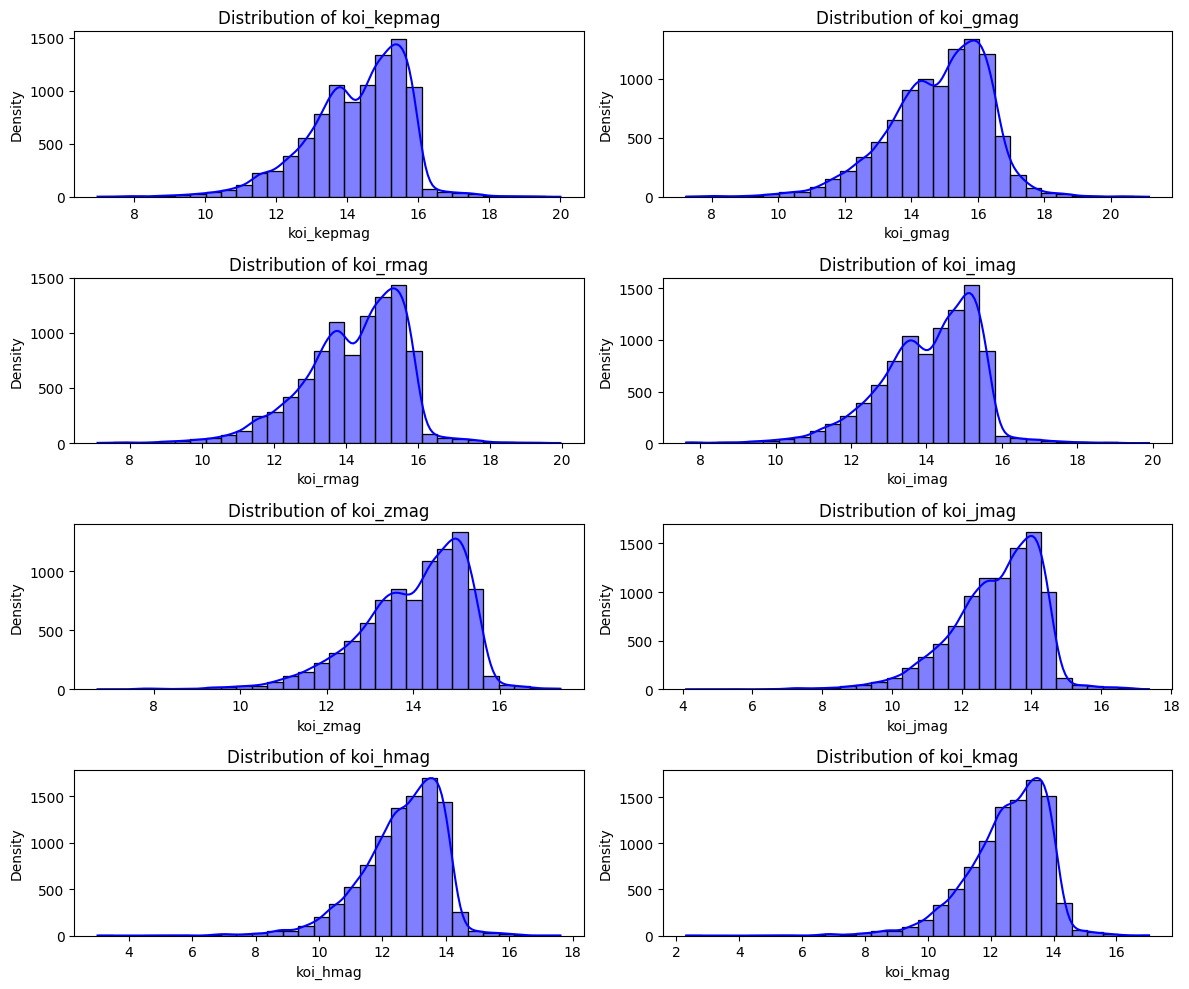

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column].dropna(), kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


If the distribution has local and global maxima, it indicates that there may be subgroups or different patterns in your data. In such cases, using the median for imputation is often a safer choice than the mean, especially if there are outliers or the distribution is not symmetric.

In [ ]:
import numpy as np

# List of columns to impute
columns_to_impute = ['koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag']

for column in columns_to_impute:
    # Check missing values
    missing_values = data[column].isna().sum()
    print(f"\nNumber of missing values in '{column}': {missing_values}")

    # Impute missing values with the median
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

    # Confirm that missing values are filled
    missing_values_after_imputation = data[column].isna().sum()
    print(f"Number of missing values after imputation: {missing_values_after_imputation}")



Number of missing values in 'koi_kepmag': 1
Number of missing values after imputation: 0

Number of missing values in 'koi_gmag': 41
Number of missing values after imputation: 0

Number of missing values in 'koi_rmag': 9
Number of missing values after imputation: 0

Number of missing values in 'koi_imag': 154
Number of missing values after imputation: 0

Number of missing values in 'koi_zmag': 613
Number of missing values after imputation: 0

Number of missing values in 'koi_jmag': 25
Number of missing values after imputation: 0

Number of missing values in 'koi_hmag': 25
Number of missing values after imputation: 0

Number of missing values in 'koi_kmag': 25
Number of missing values after imputation: 0


In [ ]:
print('Number of missing values for each column:')
empty_columns = []

for col in data.columns:
    missing_count = data[col].isna().sum()
    print('\t%s: %d' % (col, missing_count))

    if missing_count > 0 :
        # add the column to the empty columns list
        empty_columns.append(col)

print('\nColumns with empty values list:', empty_columns)
print('\nTotal number of Columns with empty values:', len(empty_columns))

data.head(20)

Number of missing values for each column:
	kepid: 0
	kepoi_name: 0
	kepler_name: 0
	koi_disposition: 0
	koi_pdisposition: 0
	koi_fpflag_nt: 0
	koi_fpflag_ss: 0
	koi_fpflag_co: 0
	koi_fpflag_ec: 0
	koi_period: 0
	koi_time0bk: 0
	koi_time0: 0
	koi_count: 0
	ra: 0
	dec: 0
	koi_kepmag: 0
	koi_gmag: 0
	koi_rmag: 0
	koi_imag: 0
	koi_zmag: 0
	koi_jmag: 0
	koi_hmag: 0
	koi_kmag: 0

Columns with empty values list: []

Total number of Columns with empty values: 0


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_count,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
rowid,,,,,,,,,,,,,,,,,,,,,,,
1,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,0,0,0,0,2.470613,122.763305,2454955.763,1,286.80847,49.316399,11.338,11.736,11.275,11.1680,11.126,10.232,9.920,9.846
2,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,0,1,0,0,2.204735,121.358542,2454954.359,1,292.24728,47.969521,10.463,10.935,10.490,14.3175,14.254,9.555,9.344,9.334
3,10748390,K00003.01,Kepler-3 b,CONFIRMED,CANDIDATE,0,0,0,0,4.887803,124.813081,2454957.813,1,297.70935,48.080853,9.174,10.665,9.479,14.3175,14.254,7.608,7.131,7.009
4,3861595,K00004.01,Kepler-1658 b,CONFIRMED,CANDIDATE,0,0,0,0,3.849372,157.526686,2454990.527,1,294.35654,38.947380,11.432,11.755,11.354,11.2940,11.305,10.475,10.266,10.195
5,8554498,K00005.01,Unknown,CANDIDATE,CANDIDATE,0,0,0,0,4.780328,132.974086,2454965.974,2,289.73972,44.647419,11.665,12.085,11.601,11.4850,11.458,10.542,10.257,10.213
6,8554498,K00005.02,Unknown,FALSE POSITIVE,FALSE POSITIVE,1,0,0,0,7.051856,133.366902,2454966.367,2,289.73972,44.647419,11.665,12.085,11.601,11.4850,11.458,10.542,10.257,10.213
7,3248033,K00006.01,Unknown,FALSE POSITIVE,FALSE POSITIVE,0,0,1,1,1.334101,133.703081,2454966.703,1,294.59955,38.366772,12.161,12.427,12.098,12.0470,12.024,11.259,11.020,10.995
8,11853905,K00007.01,Kepler-4 b,CONFIRMED,CANDIDATE,0,0,0,0,3.213669,123.611878,2454956.612,1,285.61533,50.135750,12.211,12.614,12.135,12.0380,11.963,11.122,10.836,10.805
9,5903312,K00008.01,Unknown,FALSE POSITIVE,FALSE POSITIVE,0,0,1,1,1.160153,121.704645,2454954.705,1,298.66101,41.137890,12.450,12.862,12.385,12.2730,12.214,11.371,11.092,11.040


*Now* our data is ready to proceed to next phases

## Data Visualization

#### box plot:

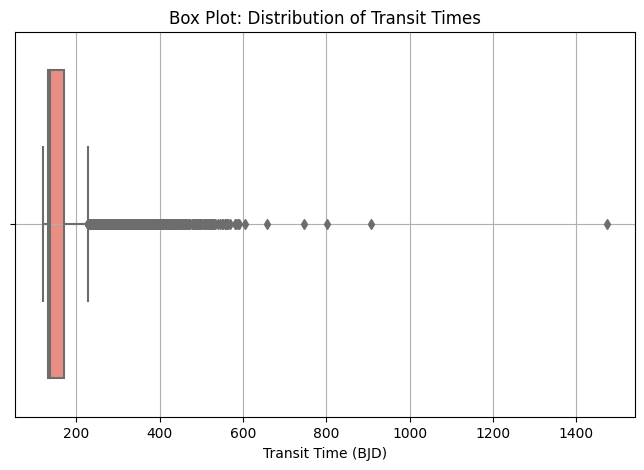

In [ ]:
# Box plot for koi_time0bk
plt.figure(figsize=(8, 5))
sns.boxplot(x='koi_time0bk', data=data, color='salmon')
plt.title('Box Plot: Distribution of Transit Times')
plt.xlabel('Transit Time (BJD)')
plt.grid(True)
plt.show()

#### scatter plot:

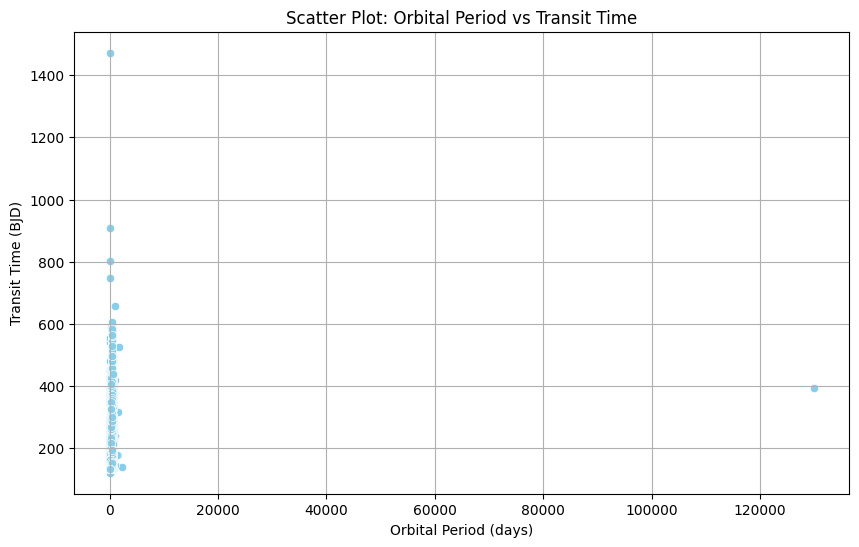

In [ ]:
# Scatter plot for koi_period vs koi_time0bk
plt.figure(figsize=(10, 6))
sns.scatterplot(x='koi_period', y='koi_time0bk', data=data, alpha=1, color='skyblue')
plt.title('Scatter Plot: Orbital Period vs Transit Time')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Transit Time (BJD)')
plt.grid(True)
plt.show()

* We can infer that Transit time and Orbital Period are uncorrelated.

#### Histogram:

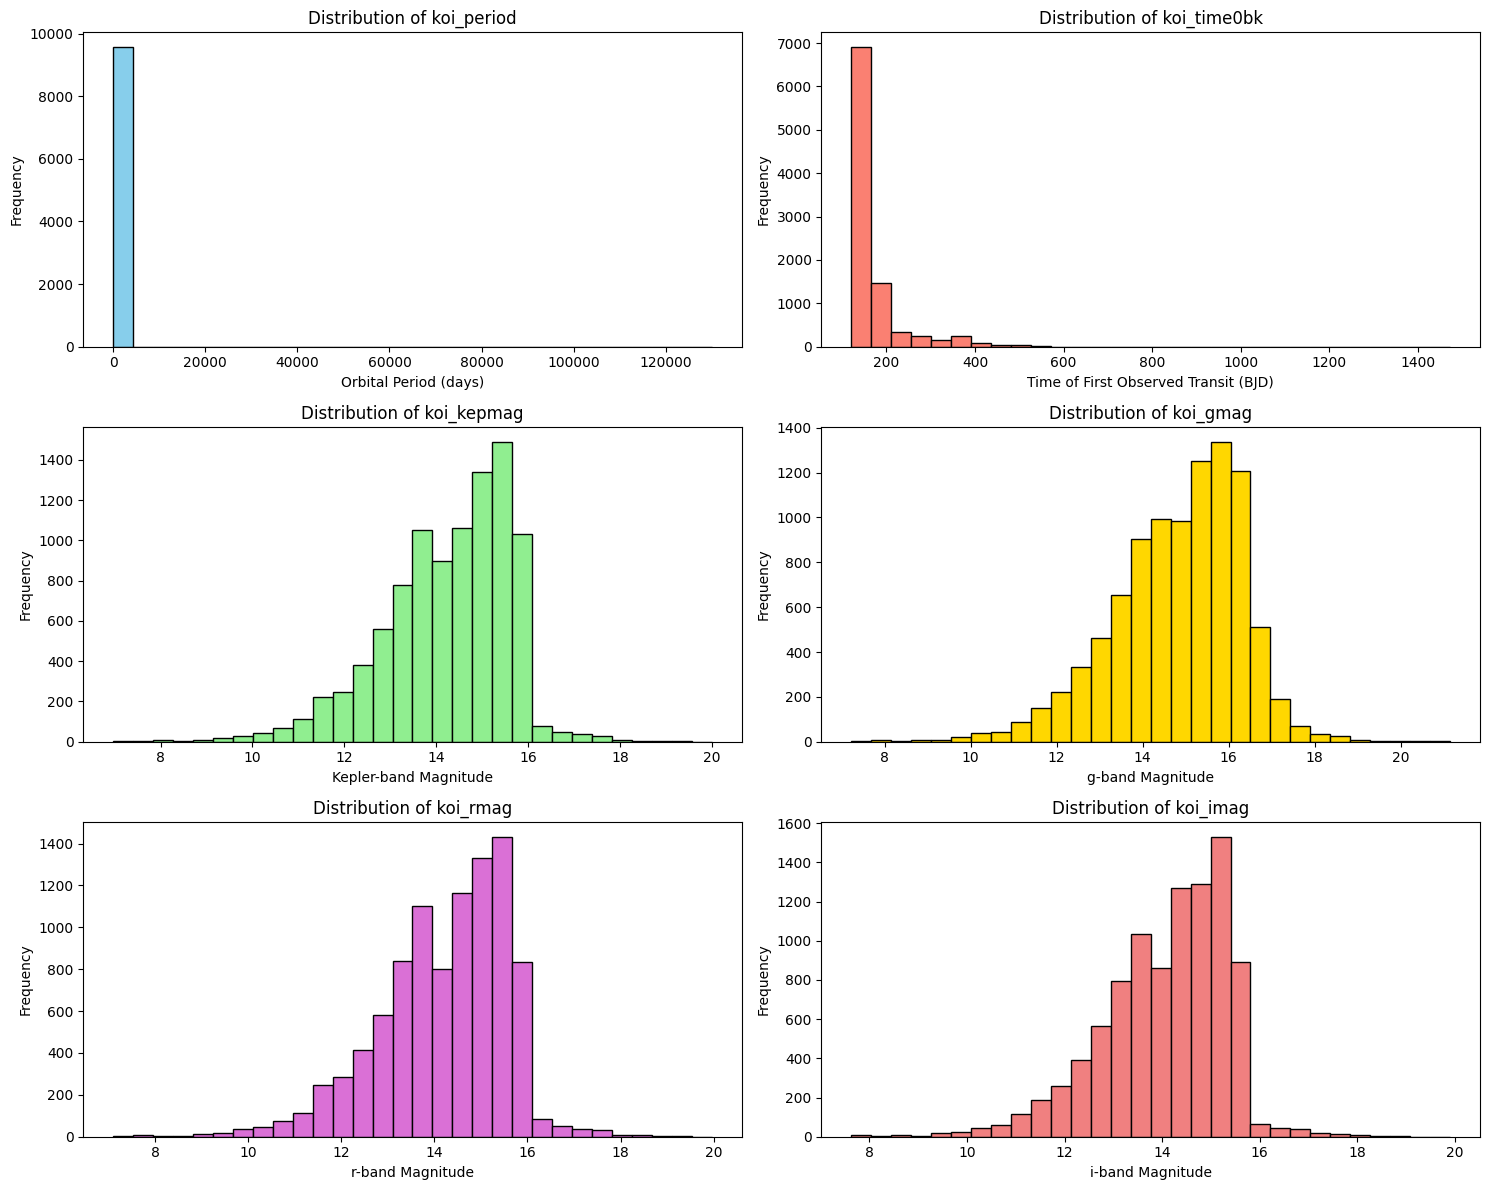

In [ ]:
# Set up the figure and axis for subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# Histogram for koi_period
axes[0, 0].hist(data['koi_period'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of koi_period')
axes[0, 0].set_xlabel('Orbital Period (days)')
axes[0, 0].set_ylabel('Frequency')

# Histogram for koi_time0bk
axes[0, 1].hist(data['koi_time0bk'], bins=30, color='salmon', edgecolor='black')
axes[0, 1].set_title('Distribution of koi_time0bk')
axes[0, 1].set_xlabel('Time of First Observed Transit (BJD)')
axes[0, 1].set_ylabel('Frequency')

# Histogram for koi_kepmag
axes[1, 0].hist(data['koi_kepmag'], bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribution of koi_kepmag')
axes[1, 0].set_xlabel('Kepler-band Magnitude')
axes[1, 0].set_ylabel('Frequency')

# Histogram for koi_gmag
axes[1, 1].hist(data['koi_gmag'], bins=30, color='gold', edgecolor='black')
axes[1, 1].set_title('Distribution of koi_gmag')
axes[1, 1].set_xlabel('g-band Magnitude')
axes[1, 1].set_ylabel('Frequency')

# Histogram for koi_rmag
axes[2, 0].hist(data['koi_rmag'], bins=30, color='orchid', edgecolor='black')
axes[2, 0].set_title('Distribution of koi_rmag')
axes[2, 0].set_xlabel('r-band Magnitude')
axes[2, 0].set_ylabel('Frequency')

# Histogram for koi_imag
axes[2, 1].hist(data['koi_imag'], bins=30, color='lightcoral', edgecolor='black')
axes[2, 1].set_title('Distribution of koi_imag')
axes[2, 1].set_xlabel('i-band Magnitude')
axes[2, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

* Most of Koi_time0bk is between [50, 100].

* The magnitudes behave as normal disibutions.

#### koi_disposition  (pie / bar chart ):

In [ ]:

koi_disposition_counts = data.koi_disposition.value_counts()
koi_disposition_counts

FALSE POSITIVE    4839
CONFIRMED         2741
CANDIDATE         1984
Name: koi_disposition, dtype: int64

Half of the keplers are False Positives.

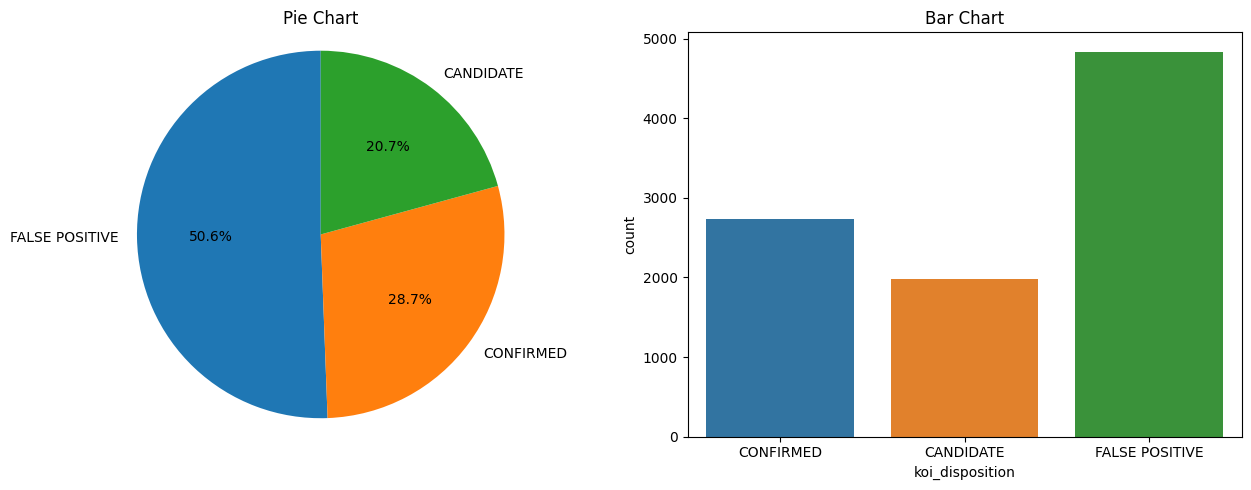

In [ ]:
# Data for pie chart
names = ["FALSE POSITIVE", "CONFIRMED", "CANDIDATE"]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Pie chart
ax1.pie(koi_disposition_counts, labels=names, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax1.set_title('Pie Chart')

# Bar chart
sns.countplot(x='koi_disposition', data=data, ax=ax2)
ax2.set_title('Bar Chart')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

* The data is a bit unbalanced, as there are more False Positives than the Confirmed planed (50.6% and 28.7% accordingly)

#### koi_pdisposition (pie / bar chart ):

In [ ]:
koi_pdisposition_counts = data.koi_pdisposition.value_counts()
koi_pdisposition_counts

FALSE POSITIVE    4847
CANDIDATE         4717
Name: koi_pdisposition, dtype: int64

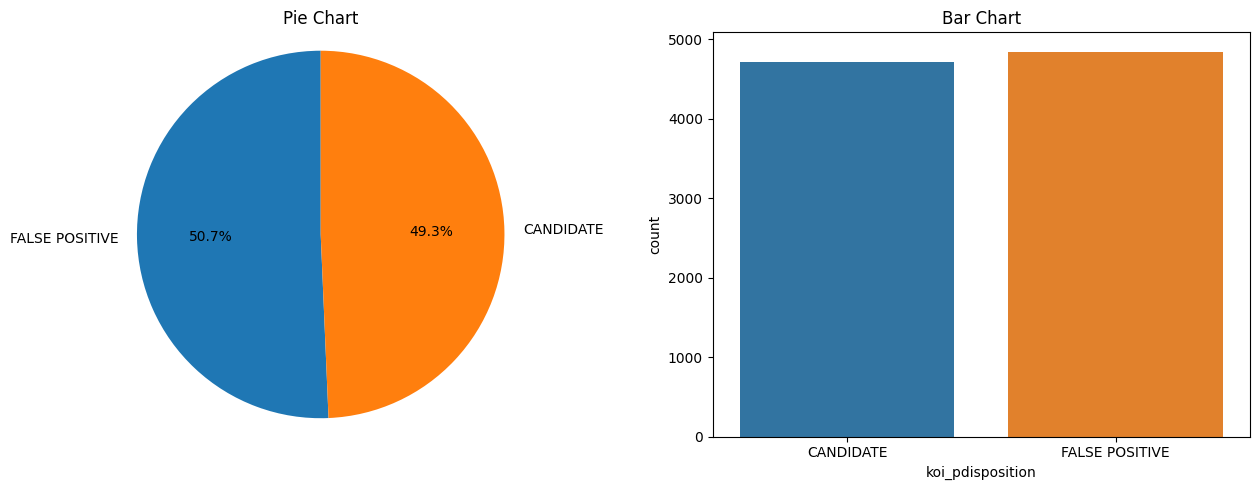

In [ ]:
# Data for pie chart
names = ["FALSE POSITIVE",  "CANDIDATE"]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Pie chart
ax1.pie(koi_pdisposition_counts, labels=names, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax1.set_title('Pie Chart')

# Bar chart
sns.countplot(x='koi_pdisposition', data=data, ax=ax2)
ax2.set_title('Bar Chart')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# EDA and Feature Selection


### EDA

In [ ]:
print(data.describe())


              kepid  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
count  9.564000e+03    9564.000000    9564.000000    9564.000000   
mean   7.690628e+06       0.208595       0.232748       0.197512   
std    2.653459e+06       4.767290       0.422605       0.398142   
min    7.574500e+05       0.000000       0.000000       0.000000   
25%    5.556034e+06       0.000000       0.000000       0.000000   
50%    7.906892e+06       0.000000       0.000000       0.000000   
75%    9.873066e+06       0.000000       0.000000       0.000000   
max    1.293514e+07     465.000000       1.000000       1.000000   

       koi_fpflag_ec     koi_period  koi_time0bk     koi_time0    koi_count  \
count    9564.000000    9564.000000  9564.000000  9.564000e+03  9564.000000   
mean        0.120033      75.671358   166.183251  2.454999e+06     1.406315   
std         0.325018    1334.744046    67.918960  6.791896e+01     0.873289   
min         0.000000       0.241843   120.515914  2.454954e+06     1.00

Visualize the distribution of key features such as koi_period, koi_time0bk, and magnitudes (koi_kepmag, koi_gmag, etc.).

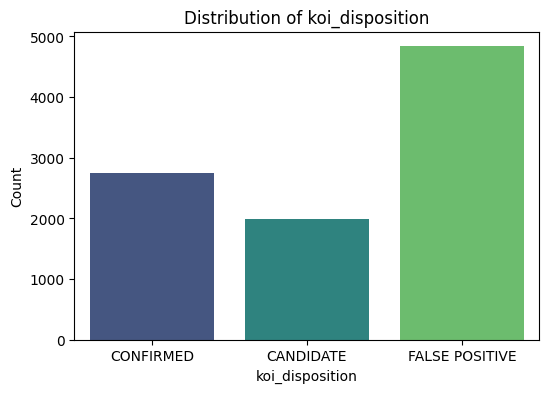

In [ ]:
# Check the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='koi_disposition', data=data, palette='viridis')
plt.title('Distribution of koi_disposition')
plt.xlabel('koi_disposition')
plt.ylabel('Count')
plt.show()

Calculate the correlation matrix and visualize it using a heatmap.

<ipython-input-42-ebb7509a5934>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


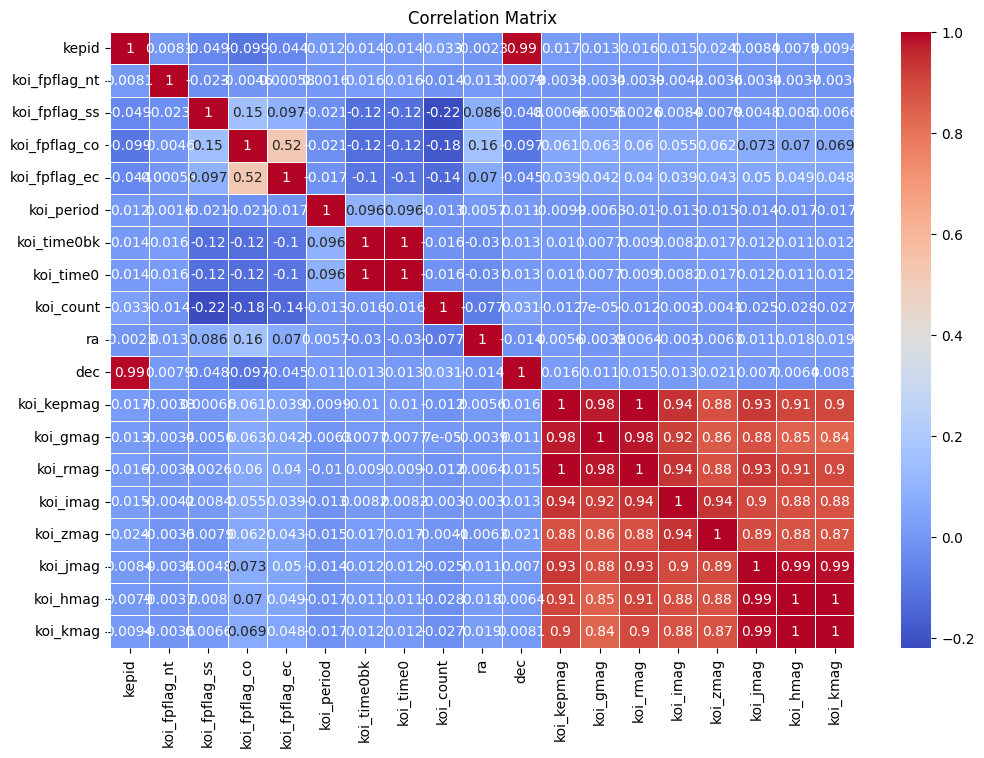

In [ ]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Display a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

* A high correlaion in the magnitudes, can be due to the similarity in their caluculated expressions.

### Feature Selection

the top 5 important features based on the feature importance from the RandomForestClassifier

In [ ]:
# Assuming 'koi_disposition' is  target variable
X = data.drop(['koi_disposition', 'kepoi_name', 'kepler_name'], axis=1)
y = data['koi_disposition']

# Ensure numeric columns are in the correct format
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Create a RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(X_numeric, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get the indices of the top 5 features
selected_feature_indices_rf = np.argsort(feature_importances)[::-1][:5]

# Get the corresponding feature names
selected_feature_names_rf = X_numeric.columns[selected_feature_indices_rf]

# Display the selected features
print("Selected Features (Feature Importance):", selected_feature_names_rf)


Selected Features (Feature Importance): Index(['koi_fpflag_ss', 'koi_fpflag_nt', 'koi_fpflag_co', 'koi_period',
       'koi_count'],
      dtype='object')


Recursive Feature Elimination (RFE) with Cross-Validation:

In [ ]:
# Assuming 'koi_disposition' is target variable
X = data.drop(['koi_disposition', 'kepoi_name', 'kepler_name'], axis=1)
y = data['koi_disposition']

# One-hot encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Create a RandomForestClassifier
rf_model = RandomForestClassifier()

# Create RFECV with cross-validation
rfecv = RFECV(estimator=rf_model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_encoded, y)

# Get selected features
selected_feature_indices_rfe = rfecv.support_
selected_feature_names_rfe = X_encoded.columns[selected_feature_indices_rfe]

# Display the selected features
print("Selected Features (RFE with Cross-Validation):", selected_feature_names_rfe)

Selected Features (RFE with Cross-Validation): Index(['koi_period', 'koi_time0bk', 'koi_pdisposition_FALSE POSITIVE'], dtype='object')


Mutual Information

In [ ]:
# Assuming 'koi_disposition' is target variable
X = data.drop(['koi_disposition', 'kepid', 'kepoi_name', 'kepler_name'], axis=1)
y = data['koi_disposition']

# One-hot encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Create a SelectKBest transformer using Mutual Information
k_best = SelectKBest(score_func=mutual_info_classif, k=5)  # Set k to 5 for top 5 features

# Fit the transformer on the data
k_best.fit(X_encoded, y)

# Get feature scores
feature_scores = k_best.scores_

# Get indices of the top 5 features
top_feature_indices = np.argsort(feature_scores)[::-1][:5]

# Get names of the top 5 features
top_feature_names = X_encoded.columns[top_feature_indices]

# Display the selected features
print("Top 5 Features based on Mutual Information:")
print(top_feature_names)

Top 5 Features based on Mutual Information:
Index(['koi_pdisposition_FALSE POSITIVE', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_period', 'koi_fpflag_nt'],
      dtype='object')


Forward Selection with Cross-Validation

In [ ]:
# Assuming 'koi_disposition' is your target variable
X = data.drop(['koi_disposition', 'kepoi_name', 'kepler_name'], axis=1)
y = data['koi_disposition']

# Ensure numeric columns are in the correct format
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Create an empty list to store selected features
selected_features_forward = []

# Create a RandomForestClassifier
rf_model = RandomForestClassifier()

# Number of features to select (you can adjust this)
num_features_to_select = 5

for i in range(num_features_to_select):
    best_feature = None
    best_score = 0

# Iterate over remaining features not yet selected
    for feature in X_numeric.columns:
        if feature not in selected_features_forward:
            current_features = selected_features_forward + [feature]

# Check for missing values
            if X_numeric[current_features].isnull().values.any():
                continue

# Encode categorical features if needed
# (for simplicity, assuming categorical features are absent in this example)
# Evaluate model performance using cross-validation
            try:
                scores = cross_val_score(rf_model, X_numeric[current_features], y, cv=5, scoring='accuracy')
                average_score = scores.mean()

# Update best feature if the current one performs better
                if average_score > best_score:
                    best_score = average_score
                    best_feature = feature
            except Exception as e:
                print(f"Error during cross-validation: {e}")

# Add the best feature to the selected features list
    selected_features_forward.append(best_feature)

# Display the selected features
print("Selected Features (Forward Selection):", selected_features_forward)

Selected Features (Forward Selection): ['koi_count', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']


Backward elimination

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming 'koi_disposition' is your target variable
X = data.drop(['koi_disposition', 'kepoi_name', 'kepler_name','kepid'], axis=1)
y = data['koi_disposition']

# Ensure numeric columns are in the correct format
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Create a RandomForestClassifier
rf_model = RandomForestClassifier()

# Number of features to select (you can adjust this)
num_features_to_select = 13

# Initial set of features (all features)
selected_features_backward = X_numeric.columns.tolist()

for i in range(num_features_to_select):
    worst_feature = None
    worst_score = 1.0  # Initialize with a high accuracy (closer to 1 is worse)

    # Iterate over remaining features
    for feature in selected_features_backward:
        current_features = [f for f in selected_features_backward if f != feature]

        # Evaluate model performance using cross-validation
        try:
            scores = cross_val_score(rf_model, X_numeric[current_features], y, cv=5, scoring='accuracy')
            average_score = scores.mean()

            # Update worst feature if the current one performs worse
            if average_score < worst_score:
                worst_score = average_score
                worst_feature = feature
        except Exception as e:
                print(f"Error: {e}")
    # Remove the worst feature from the selected features list
    selected_features_backward.remove(worst_feature)

    # Display the selected features after each iteration
    print(f"Iteration {i+1} - Selected Features: {selected_features_backward}")

# Display the final selected features
print("Final Selected Features (Backward Elimination):", selected_features_backward)


Iteration 1 - Selected Features: ['koi_fpflag_nt', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_time0', 'koi_count', 'ra', 'dec', 'koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag']
Iteration 2 - Selected Features: ['koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_time0', 'koi_count', 'ra', 'dec', 'koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag']
Iteration 3 - Selected Features: ['koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_time0', 'ra', 'dec', 'koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag']
Iteration 4 - Selected Features: ['koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_time0', 'ra', 'dec', 'koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag']
Iteration 5 - Selected Features: ['koi_period', 'koi_time0bk', 'koi_time0', 'ra', 'dec', '

# Training (before feature selection)

### KNN

In [52]:
# Data preprocessing
X = data.drop('koi_disposition', axis=1)
y = data['koi_disposition']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numeric features preprocessing
numeric_imputer = SimpleImputer(strategy='mean')
X_train_numeric = numeric_imputer.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_numeric = numeric_imputer.transform(X_test.select_dtypes(include=['float64', 'int64']))

scaler = StandardScaler()
X_train_numeric_scaled = scaler.fit_transform(X_train_numeric)
X_test_numeric_scaled = scaler.transform(X_test_numeric)

# Categorical features preprocessing
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train_categorical = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test_categorical = categorical_imputer.transform(X_test[categorical_cols])

onehot_encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical_encoded = onehot_encoder.fit_transform(X_train_categorical)
X_test_categorical_encoded = onehot_encoder.transform(X_test_categorical)

# Combine preprocessed numeric and categorical features
X_train_processed = np.hstack((X_train_numeric_scaled, X_train_categorical_encoded.toarray()))
X_test_processed = np.hstack((X_test_numeric_scaled, X_test_categorical_encoded.toarray()))

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_processed, y_train)

# Predictions on the test set
knn_pred = knn_model.predict(X_test_processed)

# Evaluation metrics for KNN
print("K-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred, average='weighted'))
print("Recall:", recall_score(y_test, knn_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, knn_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))

K-Nearest Neighbors Metrics:
Accuracy: 0.9121798222686879
Precision: 0.9290343946164973
Recall: 0.9121798222686879
F1 Score: 0.9127471030161933
Confusion Matrix:
 [[385  11   5]
 [140 392   1]
 [  8   3 968]]
Classification Report:
                 precision    recall  f1-score   support

     CANDIDATE       0.72      0.96      0.82       401
     CONFIRMED       0.97      0.74      0.83       533
FALSE POSITIVE       0.99      0.99      0.99       979

      accuracy                           0.91      1913
     macro avg       0.89      0.89      0.88      1913
  weighted avg       0.93      0.91      0.91      1913



### SVM

In [ ]:
# Data preprocessing
X = data.drop('koi_disposition', axis=1)
y = (data['koi_disposition'] == 'CONFIRMED').astype(int)  # Binary classification, converting to 0 or 1


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop non-numeric columns from X_train
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])

# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_numeric, y_train)


# Predictions on the test set
svm_pred = svm_model.predict(X_test)

# Evaluation metrics for SVM
print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred))
print("Recall:", recall_score(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

# Visualize the decision boundary (2D scatter plot for simplicity)
plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(x='koi_period', y='koi_time0bk', hue=data['koi_disposition'], data=data)
plt.title('Scatter Plot with SVM Decision Boundary')
plt.xlabel('koi_period')
plt.ylabel('koi_time0bk')

# Plot the decision boundary and margins
xx, yy = np.meshgrid(np.linspace(X['koi_period'].min(), X['koi_period'].max(), 50),
                     np.linspace(X['koi_time0bk'].min(), X['koi_time0bk'].max(), 50))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
plt.show()

###XGBOOST

In [53]:
# Data preprocessing
X = data.drop(columns={'koi_disposition', 'kepler_name', 'koi_pdisposition', 'kepoi_name'}, axis=1)
y = (data['koi_disposition'] == 'CONFIRMED').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)

scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validated Accuracy: {scores.mean()}")

Accuracy: 0.8421327757449033
Cross-validated Accuracy: 0.8133610705872831


###RANDOM FOREST

In [54]:
# Data preprocessing
X = data.drop(['koi_disposition', 'kepoi_name', 'kepler_name'], axis=1)
y = data['koi_disposition']

# Identify categorical columns
categorical_columns = ['koi_pdisposition']

# Separate numerical and categorical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = [col for col in X.columns if col not in numerical_columns]

# Create transformers for numerical and categorical columns
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier with a preprocessing pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8427


# Training (after feature selection)

### KNN

In [61]:
# Data preprocessing
X = data[['koi_count', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_period']]
y = data['koi_disposition']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create and train the KNN model using the preprocessor
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Fit the model
knn_model.fit(X_train, y_train)

# Predictions on the test set
knn_pred = knn_model.predict(X_test)

# Evaluation metrics for KNN
print("K-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred, average='weighted'))
print("Recall:", recall_score(y_test, knn_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, knn_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))

K-Nearest Neighbors Metrics:
Accuracy: 0.7898588604286461
Precision: 0.7917994509487382
Recall: 0.7898588604286461
F1 Score: 0.7899981513110876
Confusion Matrix:
 [[195 194  12]
 [148 378   7]
 [ 21  20 938]]
Classification Report:
                 precision    recall  f1-score   support

     CANDIDATE       0.54      0.49      0.51       401
     CONFIRMED       0.64      0.71      0.67       533
FALSE POSITIVE       0.98      0.96      0.97       979

      accuracy                           0.79      1913
     macro avg       0.72      0.72      0.72      1913
  weighted avg       0.79      0.79      0.79      1913



### SVM

In [ ]:
# Data preprocessing
X = data.drop('koi_disposition', axis=1)
y = (data['koi_disposition'] == 'CONFIRMED').astype(int)  # Binary classification, converting to 0 or 1


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop non-numeric columns from X_train
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])

# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_numeric, y_train)


# Predictions on the test set
svm_pred = svm_model.predict(X_test)

# Evaluation metrics for SVM
print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred))
print("Recall:", recall_score(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

# Visualize the decision boundary (2D scatter plot for simplicity)
plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(x='koi_period', y='koi_time0bk', hue=data['koi_disposition'], data=data)
plt.title('Scatter Plot with SVM Decision Boundary')
plt.xlabel('koi_period')
plt.ylabel('koi_time0bk')

# Plot the decision boundary and margins
xx, yy = np.meshgrid(np.linspace(X['koi_period'].min(), X['koi_period'].max(), 50),
                     np.linspace(X['koi_time0bk'].min(), X['koi_time0bk'].max(), 50))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
plt.show()

### Random Forest

In [58]:
# Data preprocessing
X = data[['koi_count', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_period']]
y = data['koi_disposition']

# Identify categorical columns
categorical_columns = ['koi_pdisposition']

# Separate numerical and categorical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = [col for col in X.columns if col not in numerical_columns]

# Create transformers for numerical and categorical columns
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier with a preprocessing pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7632


### XGBOOST

In [63]:
# Data preprocessing
X = data[['koi_count', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_period']]
y = (data['koi_disposition'] == 'CONFIRMED').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)

scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validated Accuracy: {scores.mean()}")

Accuracy: 0.8306325143753267
Cross-validated Accuracy: 0.824549820978244


* After we did investigate the correlation matrix between attributes 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag', 'ra', 'dec', we can identify that longer periods are associated with higher brightness levels.

* We may suggest that exoplanets with longer orbital periods tend to be associated with brighter host stars.

* koi_time0, koi_time0bk and koi_period are possible candidate columns to predict the koi_disposition.

* By examining the relationship between 'koi_period', 'koi_time0bk', we can suggest stable, predictable orbits in the timing of transits.

* koi_fpflag_ec and koi_fpflag_co flags show a certain degree of correlation,  which suggest a consistent and interconnected identification of anomalies related to ephemeris match contamination and centroid offset during the vetting process, and therfeore an enhancement in the reliability of the vetting process.

* There is no strong linear relationship between the timing of transits and the orbital period, suggesting that these two aspects are independent of each other.

* The majority of transits occur within a [50, 100] time range.

* The normal distribution behavior of magnitudes suggests that the brightness values in different bands exhibit typical statistical patterns.

* The data is a bit unbalanced, with more False Positives than Confirmed planets (50.6% and 28.7%, respectively), which will be considered during model training to avoid biased predictions.





